In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("https://raw.githubusercontent.com/ckusheva/Sentiment-labelled/"
             "master/amazon_cells_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['message', 'label']

In [3]:
keywords = ['works', 'great', 'good', 'happy', 'satisfied', 'well', 
            'fine','excellent', 'loved', 'absolutely', 'highly', 'recommend', 
            'recommended', 'nice', 'love', 'handy', 'like', 'bad', 'worst']
sms_raw['allcaps'] = sms_raw.message.str.isupper()

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
sms_raw[['works', 'great', 'good', 'happy', 'satisfied', 'well', 'fine','excellent', 'allcaps', 'loved', 'absolutely', 'highly', 'recommend', 'recommended', 'nice', 'love', 'handy', 'like', 'bad', 'worst']] = sms_raw[['works', 'great', 'good', 'happy', 'satisfied', 'well', 'fine', 'excellent', 'allcaps', 'loved', 'absolutely', 'highly', 'recommend', 'recommended', 'nice', 'love', 'handy', 'like', 'bad', 'worst']].astype(int)


In [5]:
#sms_raw['label'] = (sms_raw['spam'] == 'spam') true false converter
sms_raw.head()


,message,label,allcaps,works,great,good,happy,satisfied,well,fine,...,absolutely,highly,recommend,recommended,nice,love,handy,like,bad,worst
0,So there is no way for me to plug it in here i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Good case, Excellent value.",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Great for the jawbone.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tied to charger for conversations lasting more...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The mic is great.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


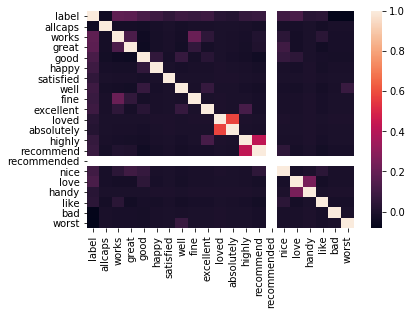

In [6]:
sns.heatmap(sms_raw.corr())

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['label']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 355


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.68, 0.64, 0.63, 0.66, 0.67, 0.62, 0.7 , 0.56, 0.67, 0.6 ])

In [10]:
bnb.predict_log_proba(data)


array([[-0.53976513, -0.87439365],
       [-2.02087779, -0.14218481],
       [-0.53976513, -0.87439365],
       ...,
       [-0.53976513, -0.87439365],
       [-0.53976513, -0.87439365],
       [-0.53976513, -0.87439365]])

In [11]:
print(data)

     works  great  good  happy  satisfied  well  fine  excellent  loved  \
0        0      0     0      0          0     0     0          0      0   
1        0      0     0      0          0     0     0          1      0   
2        0      0     0      0          0     0     0          0      0   
3        0      0     0      0          0     0     0          0      0   
4        0      0     0      0          0     0     0          0      0   
5        0      0     0      0          0     0     0          0      0   
6        0      0     0      0          0     0     0          0      0   
7        0      0     0      0          0     0     0          0      0   
8        0      0     0      0          0     0     0          0      0   
9        0      0     0      0          0     0     0          0      0   
10       0      0     0      0          0     0     0          0      0   
11       0      0     0      0          0     0     0          0      0   
12       0      0     0  

In [12]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.625


In [13]:
df=sms_raw

In [14]:
list1=[msg.split() for msg in df.message.str.lower()]

In [15]:
list2 = [word for lst_msg in list1 for word in lst_msg ]

In [16]:
list2[:20]

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'i',
 'go',
 'by',
 'a']

In [17]:
from collections import Counter
counts = Counter(list2)
print(counts)

Counter({'the': 513, 'i': 313, 'and': 310, 'is': 238, 'it': 237, 'a': 217, 'this': 197, 'to': 195, 'my': 143, 'for': 119, 'of': 119, 'phone': 118, 'not': 115, 'with': 107, 'very': 102, 'was': 90, 'in': 87, 'on': 87, 'that': 75, 'have': 72, 'good': 66, 'great': 63, 'you': 62, 'as': 45, 'but': 45, 'works': 43, 'had': 43, 'so': 42, 'are': 41, 'battery': 39, 'sound': 35, 'one': 34, 'has': 34, 'all': 34, 'quality': 33, 'from': 33, 'phone.': 33, 'would': 32, 'your': 32, 'headset': 32, 'it.': 31, 'like': 30, 'if': 29, 'than': 28, "i've": 28, "don't": 28, 'use': 27, "it's": 27, 'product': 27, 'after': 27, 'no': 26, 'be': 26, 'really': 26, 'at': 24, 'recommend': 24, '-': 24, 'or': 23, 'does': 23, 'work': 23, 'get': 22, 'when': 22, 'only': 22, "i'm": 22, 'excellent': 21, 'up': 21, 'product.': 21, 'just': 21, 'any': 20, 'out': 20, 'well': 20, 'love': 20, 'am': 20, 'me': 19, 'ear': 19, 'do': 19, 'best': 19, 'nice': 19, '2': 19, 'also': 19, 'an': 19, 'can': 18, 'about': 18, 'even': 18, 'these': 18,

In [18]:
#pd.concat([df1,df2])

In [20]:
keywords = ['phone', 'very', 'battery', 'good', 'have', 'sound', 'works', 'great', 'product', 'use', 'like', 'recommend', 'really']
sms_raw['allcaps'] = sms_raw.message.str.isupper()

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sms_raw[['phone', 'very', 'battery', 'good', 'have', 'sound', 'works', 'great', 'product', 'use', 'like', 'recommend', 'really', 'allcaps']] = sms_raw[['phone', 'very', 'battery', 'good', 'have', 'sound', 'works', 'great', 'product', 'use', 'like', 'recommend', 'really', 'allcaps']].astype(int)


In [21]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['label']

In [22]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 375


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.63, 0.6 , 0.68, 0.61, 0.56, 0.64, 0.63, 0.57, 0.61, 0.54])

In [24]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.61
